brier: 0.1696039294045085
brier: 0.1696039294045085
2003 0.18438
2004 0.17499
2005 0.16775
2006 0.19491
2007 0.13993
2008 0.15893
2009 0.16345
2010 0.16306
2011 0.1824
2012 0.15972
2013 0.17546
2014 0.1797
2015 0.14396
2016 0.17964
2017 0.15831
2018 0.179
2019 0.14635
2021 0.17963
2022 0.18833
2023 0.184
2024 0.15566


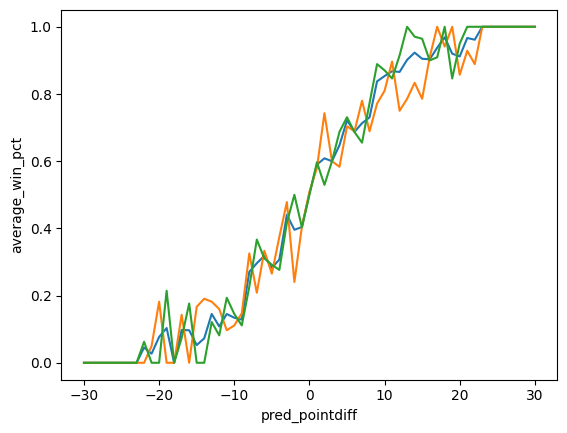

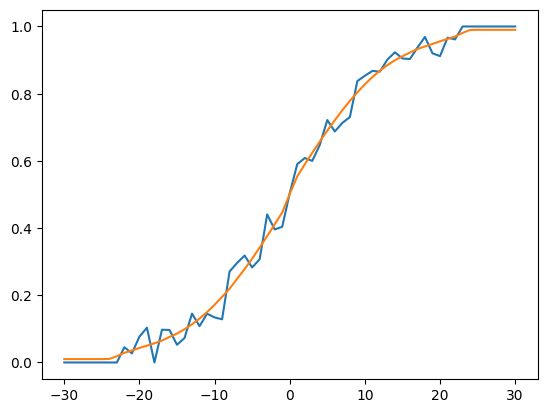

In [2]:
import pandas as pd
import import_ipynb
import numpy as np
from Predict import Prediction

data_dir = '../data/'
X = pd.read_csv(f"{data_dir}/SampleSubmissionStage2.csv")
X

predictions = Prediction()
X = predictions.get_predictions()

In [3]:
#Manual Overrides; Increase model prediction confidence 

# Step 1: Increase pred by 10% if pred < 85%
X['Pred'] = X['Pred'].apply(lambda x: x + x * 0.1 if x < 0.85 else x)

# Step 2: Apply manual overrides for specific matches
# Matches with low pred compared to expectations for Early rounds
manual_overrides = {
    '2025_1124_1280': 0.98185013,
    '2025_1140_1433': 0.980304479,
    '2025_1388_1435': 0.954379186,
    '2025_1279_1314': 0.964069204,
    '2025_1401_1463': 0.953761116,
    '2025_1417_1429': 0.973425592
}

X['Pred'] = X.apply(lambda row: manual_overrides[row['ID']] if row['ID'] in manual_overrides else row['Pred'], axis=1)

X['Pred'] = X['Pred'].round(6)
X[['ID','Pred']].to_csv('predictions.csv',index=None)